<a href="https://colab.research.google.com/github/y001003/Algorithm/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 재귀함수

In [25]:
# 재귀함수 : 자기 자신을 다시 호출하는 함수를 의미
def recursive_function(i):
    # 100번째 호출을 했을 때 종료되도록 종료 조건 명시
    if i == 10:
        return
    print(i, '번째 재귀함수에서', i + 1, '번째 재귀함수를 호출합니다.')
    recursive_function(i + 1)
    print(i, '번째 재귀함수를 종료합니다.')

recursive_function(1)

1 번째 재귀함수에서 2 번째 재귀함수를 호출합니다.
2 번째 재귀함수에서 3 번째 재귀함수를 호출합니다.
3 번째 재귀함수에서 4 번째 재귀함수를 호출합니다.
4 번째 재귀함수에서 5 번째 재귀함수를 호출합니다.
5 번째 재귀함수에서 6 번째 재귀함수를 호출합니다.
6 번째 재귀함수에서 7 번째 재귀함수를 호출합니다.
7 번째 재귀함수에서 8 번째 재귀함수를 호출합니다.
8 번째 재귀함수에서 9 번째 재귀함수를 호출합니다.
9 번째 재귀함수에서 10 번째 재귀함수를 호출합니다.
9 번째 재귀함수를 종료합니다.
8 번째 재귀함수를 종료합니다.
7 번째 재귀함수를 종료합니다.
6 번째 재귀함수를 종료합니다.
5 번째 재귀함수를 종료합니다.
4 번째 재귀함수를 종료합니다.
3 번째 재귀함수를 종료합니다.
2 번째 재귀함수를 종료합니다.
1 번째 재귀함수를 종료합니다.


In [26]:
# 반복적으로 구현한 n!
def factorial_iterative(n):        
    result = 1
    # 1부터 n까지의 수를 차례대로 곱하기
    for i in range(1, n + 1):
       result *= i
    return result

# 재귀적으로 구현한 n!
def factorial_recursive(n):        
    if n <= 1: # n이 1 이하인 경우 1을 반환
        return 1
    # n! = n * (n - 1)!를 그대로 코드로 작성하기
    return n * factorial_recursive(n - 1)

# 각각의 방식으로 구현한 n! 출력(n = 5)
print('반복적으로 구현:', factorial_iterative(5))
print('재귀적으로 구현:', factorial_recursive(5))


반복적으로 구현: 120
재귀적으로 구현: 120


In [29]:
# 유클리드 호제법(GCD)
def uclid(a, b):
    print(b)
    if a % b == 0:
        return b
    else:
        return uclid(b, a % b)

uclid(192, 150)

150
42
24
18
6


6

# DFS & BFS

## DFS

Depth-Firsh Search  
- 깊이 우선 탐색이라고 부르며 트리의 깊은 부분을 우선적으로 탐색하는 알고리즘  
- 동작 과정
1. 탐색 시작 노드를 스택에 삽입하고 방문 처리
2. 인접한 노드 중 방문하지 않은 노드를 선택하여 스택에 넣고 방문 처리
3. 2번 과정을 수행 없을 때까지 반복


In [ ]:
# DFS 함수 정의
def dfs(graph, v, visited, discovered=[]):

    # 현재 노드를 방문 처리
    visited[v] = True
    # print(v, end=' ')

    # discovered 리스트에 선택된 노드 추가
    discovered.append(v)
    
    # 현재 노드와 연결된 다른 노드를 재귀적으로 방문
    for i in graph[v]:
        print(i,"를 확인")
        if not visited[i]:           
            dfs(graph, i, visited)
    return discovered


# 각 노드가 연결된 정보를 리스트 자료형으로 표현(2차원 리스트)
graph = [
  [],
  [2, 3, 8],# 1번 노드와 연결된 노드
  [1, 7],# 2번 노드와 연결된 노드
  [1, 4, 5], # 3번 노드와 연결된 노드
  [3, 5], # 4번 노드와 연결된 노드
  [3, 4],
  [7],
  [2, 6, 8],
  [1, 7]
]

# 각 노드가 방문된 정보를 리스트 자료형으로 표현(1차원 리스트)
visited = [False] * 9

# 정의된 DFS 함수 호출
print(dfs(graph, 1, visited))

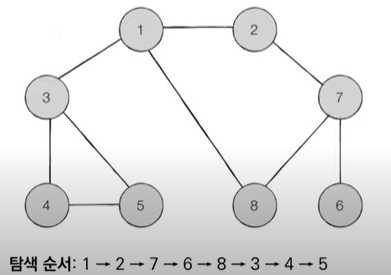

## BFS(Breadth-Firsh Search)
- 너비 우선 탐색, 그래프 트리 내에서 가까운 노드부터 우선적으로 탐색
- 큐 자료구조를 사용
- 최단거리 탐색방법으로 많이 출제됨 : 가까운 노드부터 먼저 방문하고, 먼 노드는 나중에 방문하게 되는 매커니즘 때문
- 동작 과정
1. 탐색 시작 노드를 큐에 넣고 방문 처리
2. 큐에서 노드를 꺼내고, 노드 인접 노드 중에서 방문하지 않은 노드를 모두 큐에 삽입 후 방문처리(방문 기준: 번호가 낮은 인접 노드부터)
3. 2번 과정을 수행할 수 없을 때까지 반복

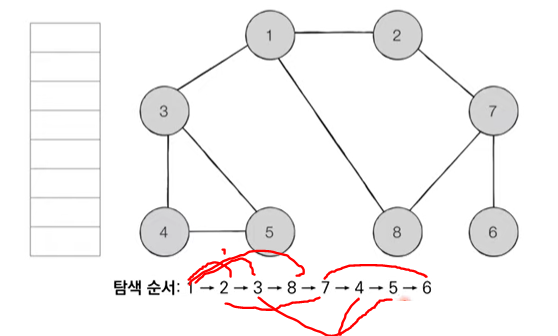

In [31]:
from collections import deque

# BFS 함수 정의
def bfs(graph, start, visited,discovered = []):
    # 큐(Queue) 구현을 위해 deque 라이브러리 사용
    queue = deque([start])
    # 현재 노드를 방문 처리
    visited[start] = True
    # 큐가 빌 때까지 반복
    while queue:
        # 큐에서 하나의 원소를 뽑아 출력
        v = queue.popleft()
        discovered.append(v)
        print(v, end=' ')
        # 해당 원소와 연결된, 아직 방문하지 않은 원소들을 큐에 삽입
        for i in graph[v]:
            if not visited[i]:
                queue.append(i)
                visited[i] = True
    return discovered

# 각 노드가 연결된 정보를 리스트 자료형으로 표현(2차원 리스트)
graph = [
  [],
  [2, 3, 8],
  [1, 7],
  [1, 4, 5],
  [3, 5],
  [3, 4],
  [7],
  [2, 6, 8],
  [1, 7]
]

# 각 노드가 방문된 정보를 리스트 자료형으로 표현(1차원 리스트)
visited = [False] * 9

# 정의된 BFS 함수 호출
bfs(graph, 1, visited)

1 2 3 8 7 4 5 6 

[1, 2, 3, 8, 7, 4, 5, 6]

## DFS & BFS 문제

### DFS 문제

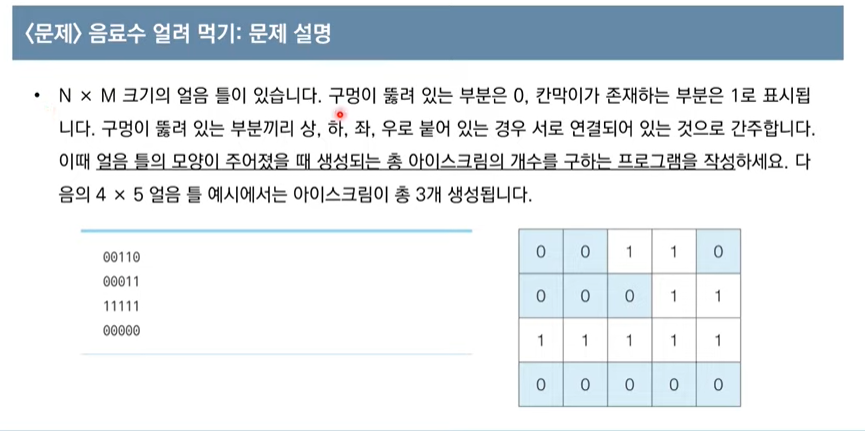

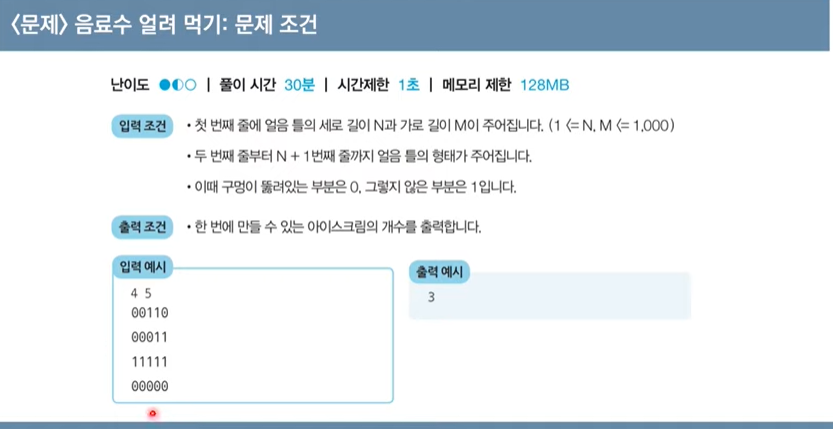

### BFS 문제

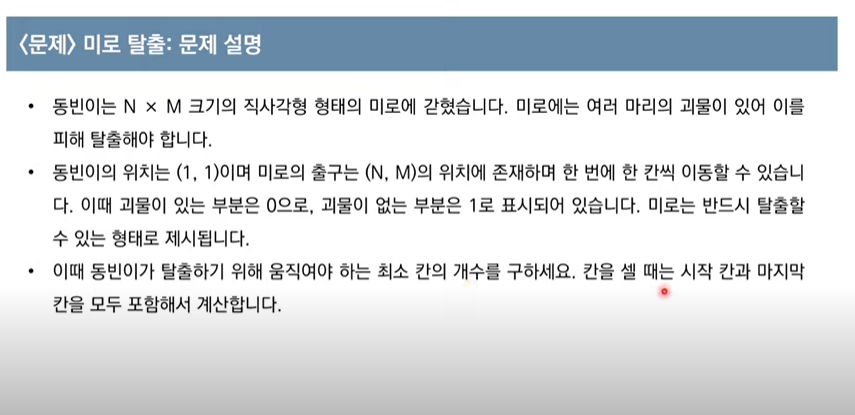

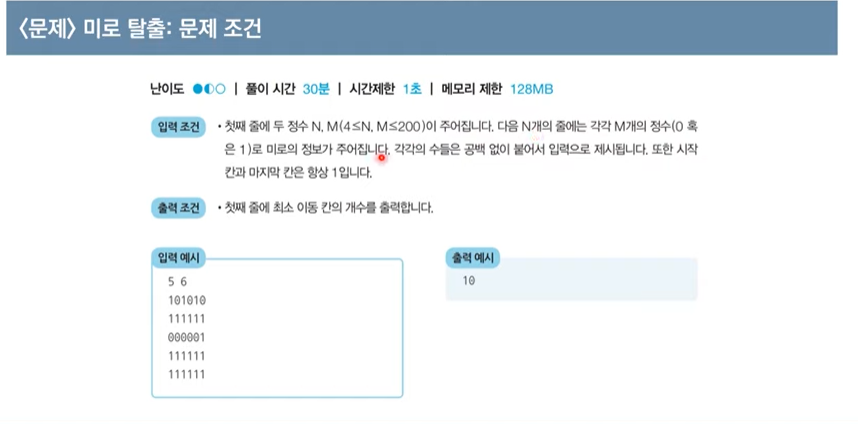